## TBSS (Tract-based spatial statistics)

In [3]:
import os
import shutil
import subprocess
import webbrowser

directory = os.getcwd()

<b> 1. Create FA data from a diffusion MRI </b>

In order to run TBSS it is needed to create a single FA image from each subject in the study. 

<tt>dtifit</tt> fits a diffusion tensor model at each voxel.

Input: 
- Diffusion weighted data (<tt>data</tt>): A 4D series of data volumes. This will include diffusion-weighted volumes and volume(s) with no diffusion weighting.
- binary brain mask (<tt>data_mask</tt>): A single binarised volume in diffusion space containing ones inside the brain and zeroes outside the brain. 
- Output basename: User specifies a basename that will be used to name the outputs of <tt>dtifit</tt>. 
- Gradient directions (<tt>bvecs</tt>): An ASCII text file containing a list of gradient directions applied during diffusion weighted volumes.
- b values (<tt>bvals</tt>): An ASCII text file containing a list of b values applied during each volume acquisition. 

Outputs:
- <tt>*_V1</tt> - 1st eigenvector
- <tt>*_V2</tt>  - 2nd eigenvector
- <tt>*_V3</tt>  - 3rd eigenvector
- <tt>*_L1</tt>  - 1st eigenvalue
- <tt>*_L2</tt>  - 2nd eigenvalue
- <tt>*_L3</tt>  - 3rd eigenvalue
- <tt>*_MD</tt>  - mean diffusivity
- <tt>*_FA</tt>  - fractional anisotropy 
- <tt>*_MO</tt>  - mode of the anisotropy 
- <tt>*_S0</tt>  - raw T2 signal with no diffusion weighting 


In [1]:
for var_path in os.listdir('FD'):
    data  = os.path.join(directory, 'FD', var_path ,'DTI', var_path + '_data.nii.gz')
    out   = os.path.join(directory, 'FD', var_path ,'DTI', var_path)
    mask  = os.path.join(directory, 'FD', var_path ,'DTI', var_path + '_data_mask.nii.gz')
    bvecs = os.path.join(directory, 'FD', var_path ,'DTI', var_path + '_bvecs.txt')
    bvals = os.path.join(directory, 'FD', var_path ,'DTI', var_path + '_bvals.txt')
    if os.path.exists(data) & os.path.exists(mask) & os.path.exists(bvecs) & os.path.exists(bvals):
        command = 'dtifit -k ' + data + ' -o ' + out + ' -m ' + mask + ' -r ' + bvecs + ' -b ' + bvals
        os.system(command)        

0 104 0 104 0 60
0 slices processed
1 slices processed
2 slices processed
3 slices processed
4 slices processed
5 slices processed
6 slices processed
7 slices processed
8 slices processed
9 slices processed
10 slices processed
11 slices processed
12 slices processed
13 slices processed
14 slices processed
15 slices processed
16 slices processed
17 slices processed
18 slices processed
19 slices processed
20 slices processed
21 slices processed
22 slices processed
23 slices processed
24 slices processed
25 slices processed
26 slices processed
27 slices processed
28 slices processed
29 slices processed
30 slices processed
31 slices processed
32 slices processed
33 slices processed
34 slices processed
35 slices processed
36 slices processed
37 slices processed
38 slices processed
39 slices processed
40 slices processed
41 slices processed
42 slices processed
43 slices processed
44 slices processed
45 slices processed
46 slices processed
47 slices processed
48 slices processed
49 slices pro

<b> 2. Preparing FA data for TBSS </b>

Creating a new folder named <tt>FA</tt> and copying files in the new folder.

In [2]:
dir_name = 'mytbss'

if not os.path.isdir(os.path.join(directory, dir_name)):
    os.mkdir(os.path.join(directory, dir_name))
    print('CREATED:', directory + '/' + dir_name)  

for var_path in os.listdir('FD'):
    path = os.path.join(directory, 'FD', var_path ,'DTI', var_path + '_FA.nii.gz')
    if os.path.exists(path):
        shutil.copy(path, os.path.join(directory, dir_name)) 

CREATED: /Users/eleonorazucchi/Desktop/BIP_project/mytbss


Running preprocessing TBSS script, which will erode FA images slightly to remove brain-edge artifacts and remove likely outliers from the diffusion tensor fitting.

The script will move all the processed FA images into a new sub-directory called <tt>FA</tt> and will also create another sub-directory called <tt>origdata</tt> where all original images are stored. 

In [10]:
subprocess.call('tbss_1_preproc *.nii.gz', cwd=directory+'/mytbss/', shell=True)

Now running "slicesdir" to generate report of all input images
Finished. To view, point your web browser at
file:/Users/eleonorazucchi/Desktop/BIP_project/mytbss/FA/slicesdir/index.html


0

The script above also runs <tt>slicesdir</tt> that will create an overview webpage containing a static view of each of the input images.

In [4]:
webbrowser.open_new_tab('file://' + directory + '/mytbss/FA/slicesdir/index.html')

True

<b> 3. Registering all the FA data </b>

Runs the nonlinear registration, aligning all FA images to a 1x1x1mm standard space. 

<tt> -n</tt> option is used to align every FA image to every other one, identifying the "most representative" one, and use this as the target image.

<tt> -T</tt> option instead aligns every FA image to the most typical subject in the study. This involves computing just one registration per subject and is more computationally efficient.

<tt> -T</tt> option was chosen since it allows to reach a good tradeoff between computational complexity and final resolution.

In [5]:
subprocess.call('tbss_2_reg -T', cwd=directory+'/mytbss/', shell=True) # HERE

<Popen: returncode: None args: 'tbss_2_reg -T'>

<b> 4. Post-registration processing </b>

The next TBSS script applies the nonlinear transforms found in the previous stage to all subjects to bring them into standard space. 

All the images are then merged into a single 4D image file called <tt>all_FA</tt>, created in a new subdirectory called <tt>stats</tt>. 

The mean of all FA images <tt>mean_FA</tt> is created and is then fed into the FA skeletonisation program to create <tt>mean_FA_skeleton</tt>. 

In [11]:
subprocess.call('tbss_3_postreg -S', cwd=directory+'/mytbss/', shell=True)

using pre-chosen target for registration
transforming all FA images into MNI152 space
FD_001_FA_FA
FD_002_FA_FA
FD_003_FA_FA
FD_004_FA_FA
FD_005_FA_FA
FD_006_FA_FA
FD_007_FA_FA
FD_008_FA_FA
FD_009_FA_FA
FD_010_FA_FA
FD_011_FA_FA
FD_012_FA_FA
FD_013_FA_FA
FD_014_FA_FA
FD_015_FA_FA
FD_016_FA_FA
FD_017_FA_FA
FD_018_FA_FA
FD_019_FA_FA
FD_020_FA_FA
HC_001_FA_FA
HC_002_FA_FA
HC_003_FA_FA
HC_004_FA_FA
HC_005_FA_FA
HC_006_FA_FA
HC_007_FA_FA
HC_008_FA_FA
HC_009_FA_FA
HC_010_FA_FA
HC_011_FA_FA
HC_013_FA_FA
HC_014_FA_FA
HC_015_FA_FA
HC_016_FA_FA
HC_017_FA_FA
HC_018_FA_FA
HC_019_FA_FA
HC_020_FA_FA
HC_021_FA_FA
merging all upsampled FA images into single 4D image
creating valid mask and mean FA
skeletonising mean FA
now view mean_FA_skeleton to check whether the default threshold of 0.2 needs changing, when running:
tbss_4_prestats <threshold>


0

In [5]:
!fsleyes mytbss/stats/all_FA mytbss/stats/mean_FA_skeleton -b 30 -cm green

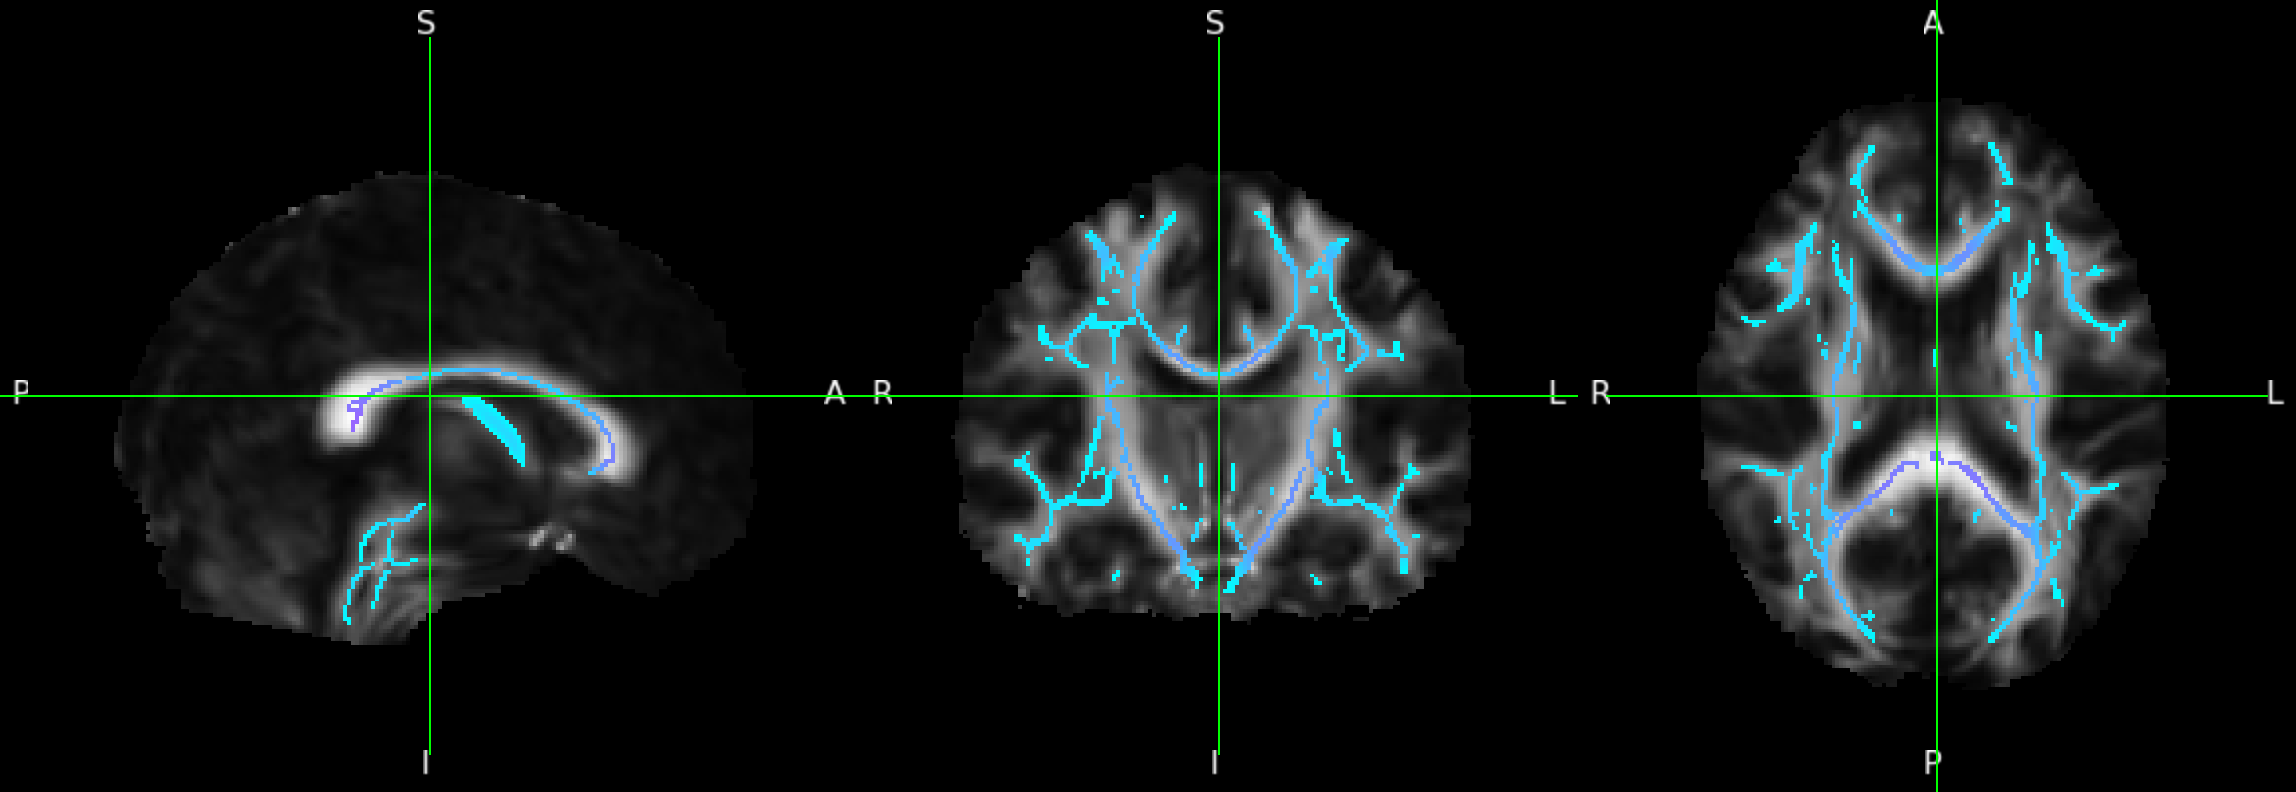

Threshold chosen: 0.3 as it gives clearer representations.

<b>5. Projecting all pre-aligned FA data onto the skeleton</b>

Next a "distance map" is created from the skeleton mask. This is used in the projection of each subject's FA onto the skeleton. 

Finally, the script takes the 4D <tt>all_FA</tt> image, that contains all subjects' aligned FA data and, for each "timepoint" projects the FA data onto the mean FA skeleton. 

The result is a 4D image file containing the skeletonised FA data, that will be fed to compute voxelwise statistics. 

In [8]:
subprocess.call('tbss_4_prestats 0.3', cwd=directory+'/mytbss/', shell=True)

<Popen: returncode: None args: 'tbss_4_prestats 0.3'>

<tt>creating skeleton mask using threshold 0.3 \
creating skeleton distancemap (for use in projection search) \
projecting all FA data onto skeleton \
now run stats - for example: \
randomise -i all_FA_skeletonised -o tbss -m mean_FA_skeleton_mask -d design.mat -t design.con -n 500 --T2 -V \
(after generating design.mat and design.con) \</tt>

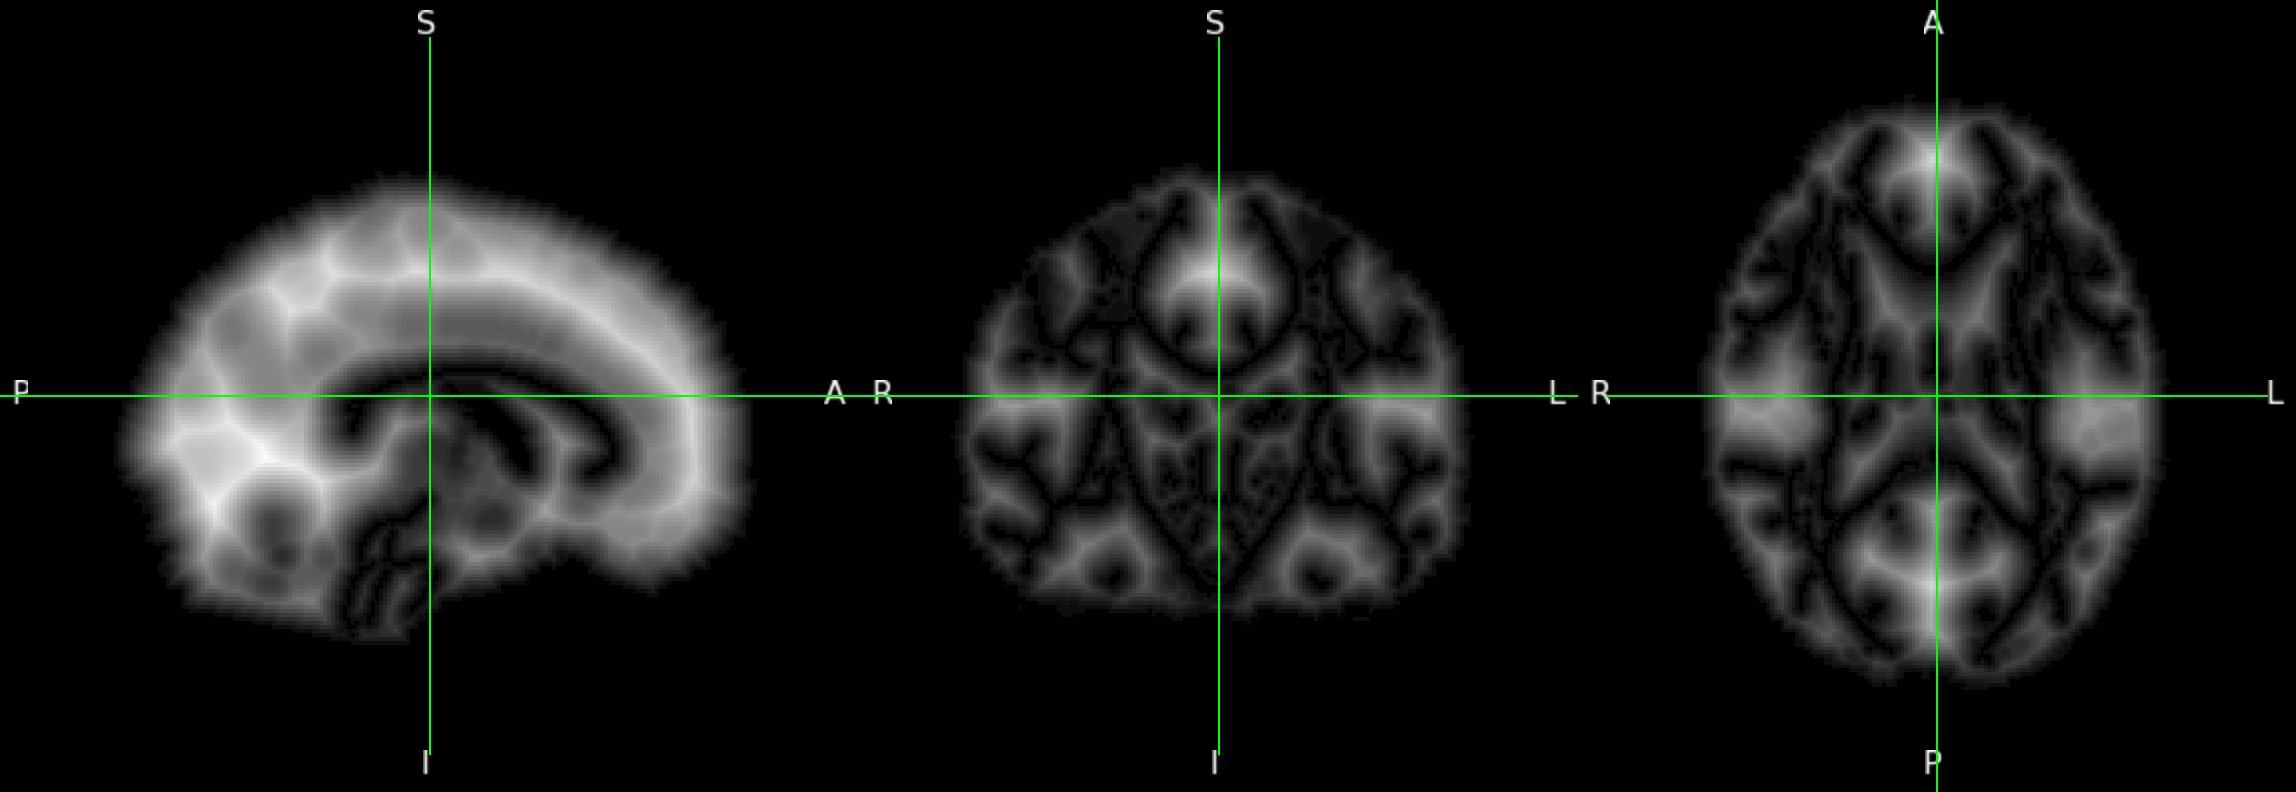

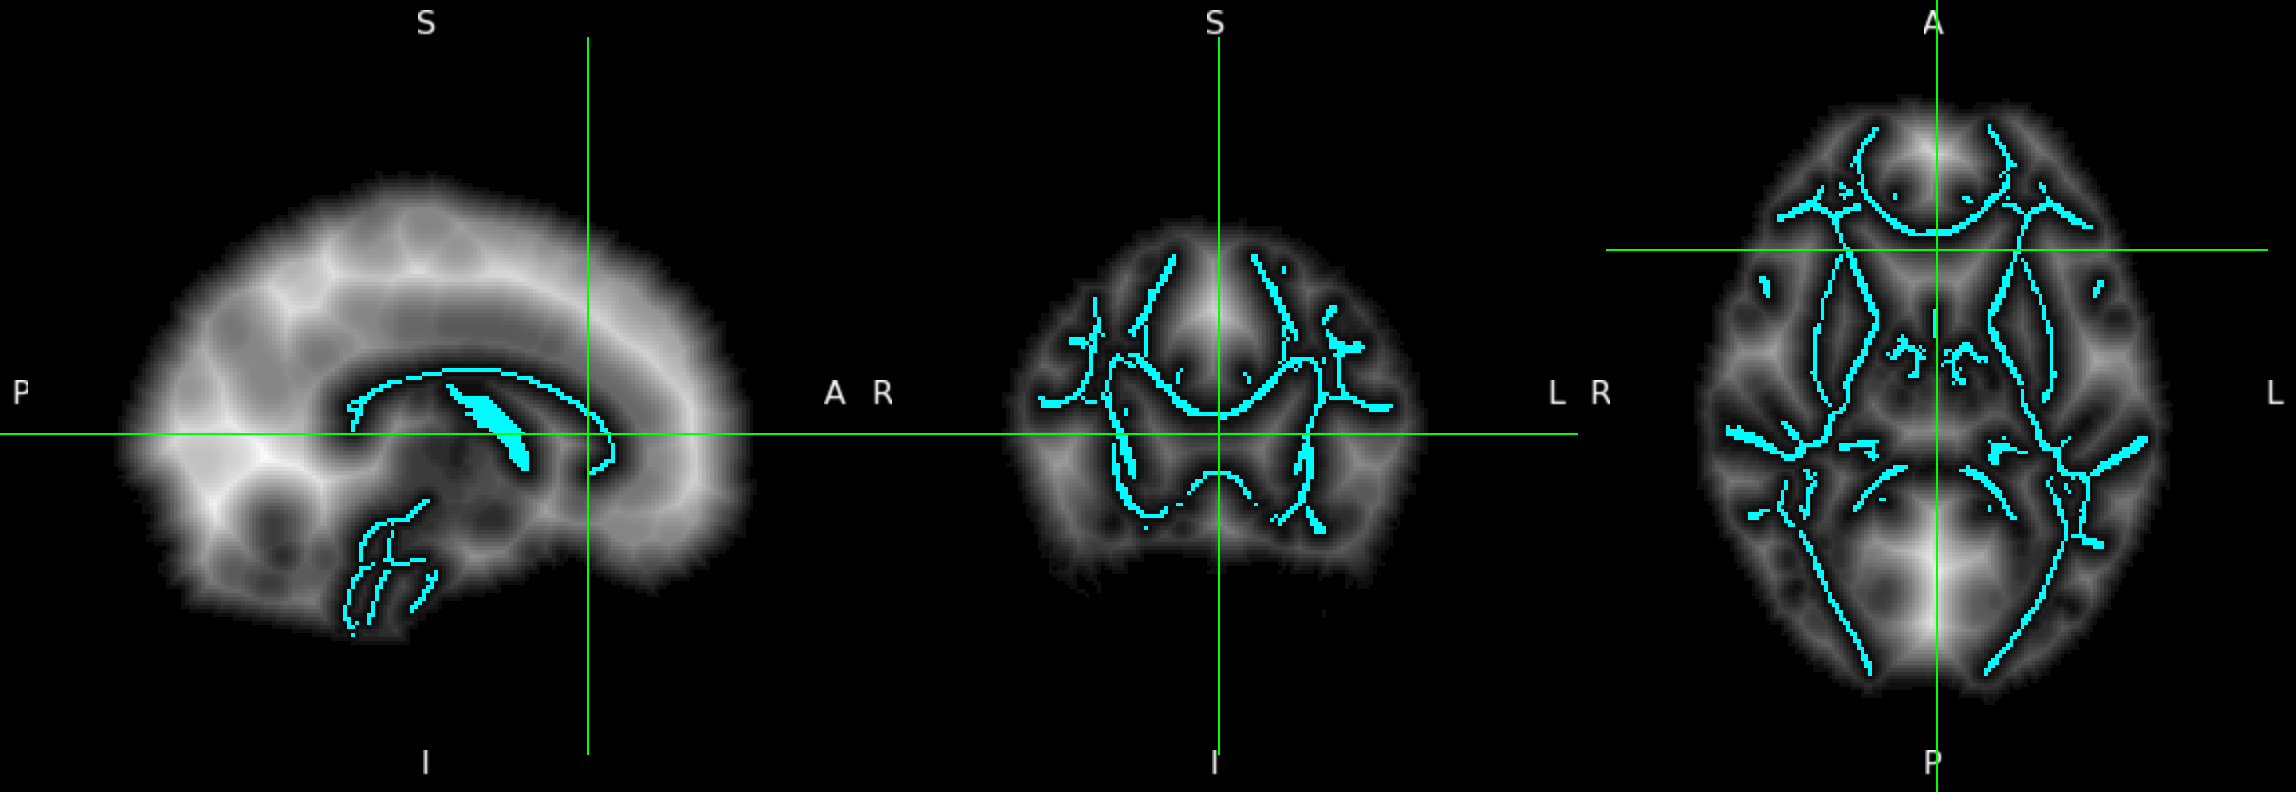

<b> 6. Voxelwise statistics on the skeletonised FA data </b>

The scope of this analysis is to find out which FA skeleton voxels are significantly different between two groups of subjects.

In [9]:
subprocess.call('imglob *_FA.*', cwd=directory+'/mytbss/FA/', shell=True)


FD_001_FA_FA FD_002_FA_FA FD_003_FA_FA FD_004_FA_FA FD_005_FA_FA FD_006_FA_FA FD_007_FA_FA FD_008_FA_FA FD_009_FA_FA FD_010_FA_FA FD_011_FA_FA FD_012_FA_FA FD_013_FA_FA FD_014_FA_FA FD_015_FA_FA FD_016_FA_FA FD_017_FA_FA FD_018_FA_FA FD_019_FA_FA FD_020_FA_FA HC_001_FA_FA HC_002_FA_FA HC_003_FA_FA HC_004_FA_FA HC_005_FA_FA HC_006_FA_FA HC_007_FA_FA HC_008_FA_FA HC_009_FA_FA HC_010_FA_FA HC_011_FA_FA HC_013_FA_FA HC_014_FA_FA HC_015_FA_FA HC_016_FA_FA HC_017_FA_FA HC_018_FA_FA HC_019_FA_FA HC_020_FA_FA HC_021_FA_FA


0

The script <tt>design_ttest2</tt> is used in case of a two-group comparison.
In our case the two groups are patients vs. healthy control with 20 individuals each. \
It creates two matrices: design and contrast, used later to fit a General Linear Model.

In [39]:
subprocess.call("design_ttest2 design 20 20", cwd=directory+'/mytbss/stats/', shell=True)

0


- <tt>1 0 </tt>  sample belongs to group 1 (patients)
- <tt>0 1 </tt>  sample belongs to group 2 (healthy control)

In [40]:
subprocess.call("cat design.mat", cwd=directory+'/mytbss/stats/', shell=True)

/NumWaves 2
/NumPoints 40
/PPheights 1 1
/Matrix
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1


0

With the following <tt>randomise</tt> command we feed the 4D projected FA data into GLM (General Linear Model) in order to find voxels which correlate with the model.

- <tt> -i </tt> input file
- <tt> -o </tt> output prefix
- <tt> -d </tt> design file
- <tt> -t </tt> design file
- <tt> -m </tt> mask file
- <tt> -n </tt> number of permutations
- <tt>--T2</tt> use TFCE (Threshold-Free Cluster Enhancement)

In [28]:
subprocess.call("randomise -i all_FA_skeletonised \
                           -o tbss -m mean_FA_skeleton_mask \
                           -d design.mat -t design.con -n 500 --T2", 
                 cwd=directory+'/mytbss/stats/', shell=True)

randomise options: -i all_FA_skeletonised -o tbss -m mean_FA_skeleton_mask -d design.mat -t design.con -n 500 --T2 
Loading Data: 
Data loaded
1.37847e+11 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutation 31
Starting

0

Contrast 1 gives the pateints > control test. \
Contrast 2 gives the pateints < control test. 

<tt>tbss_tstat2</tt> is the raw image. The TFCE p-value images (fully corrected for multiple comparisons across space) is <tt>tbss_tfce_corrp_tstat2</tt> (actually 1-p (1 minus p) for convenience of display, so thresholding at .95 gives significant clusters).

In [9]:
!fsleyes $FSLDIR/data/standard/MNI152_T1_1mm \
  mytbss/stats/mean_FA_skeleton -cm Green -b 30 \
  mytbss/stats/tbss_tstat1 -cm Red-Yellow -b 15 \
  mytbss/stats/tbss_tstat2 -cm Blue-Lightblue -b 25 

Group 1 (patients) > Group 2 (Healthy control)

<b> Displaying TBSS Results </b>

As a background MNI152 background image or mean_FA study-specific image. \
Load mean_FA_skeleton image on top of background image, to show where the skeleton was estimated, and which standard-space voxels were tested in the multi-subjects statistics.

In [74]:
!fsleyes mytbss/stats/tbss_tfce_corrp_tstat2.nii.gz

In [ ]:
!fsleyes $FSLDIR/data/standard/MNI152_T1_1mm \
         mytbss/stats/mean_FA_skeleton -cm Green -b 30 -a 70 \
         mytbss/stats/tbss_tfce_corrp_tstat2.nii.gz -cm Red-Yellow -b 95 -a 100

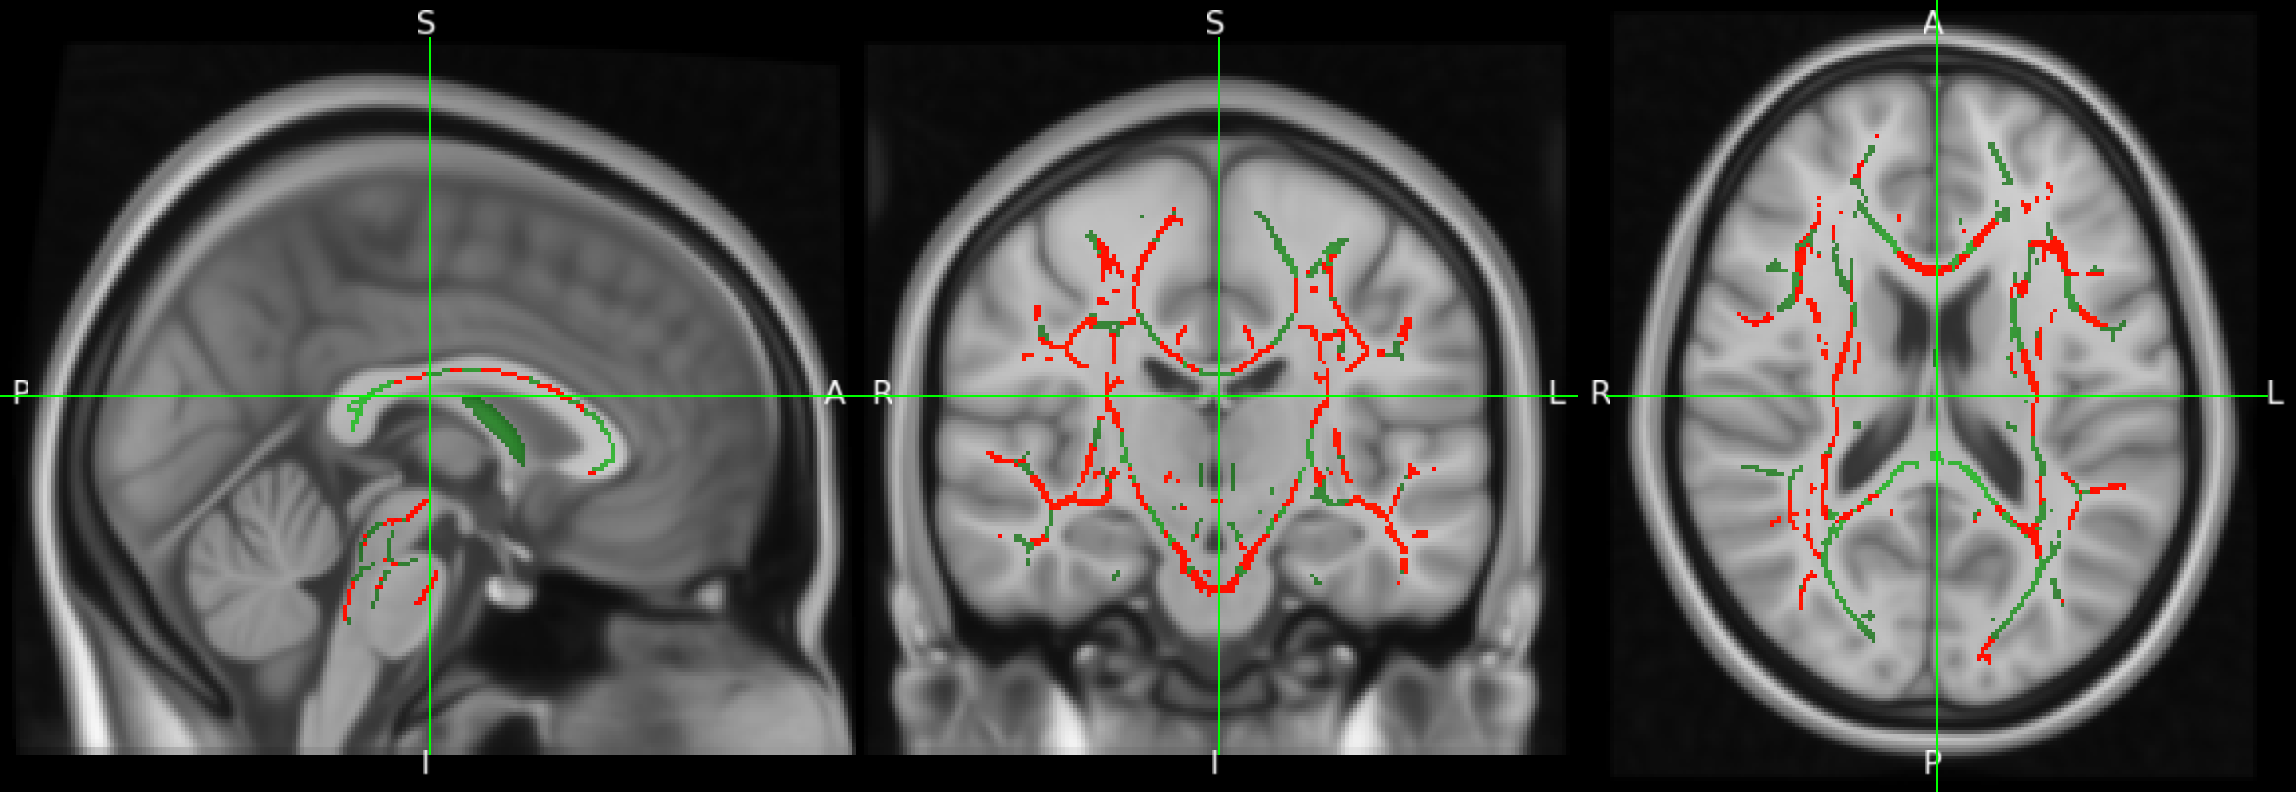

In [20]:
!tbss_fill mytbss/stats/tbss_tfce_corrp_tstat2 0.95 \
           mytbss/stats/mean_FA \
           mytbss/stats/tbss_fill

In [70]:
!fsleyes mytbss/stats/mean_FA \
         mytbss/stats/mean_FA_skeleton -cm Green -b 30 -a 70 \
         mytbss/stats/tbss_fill -cm Red-Yellow 

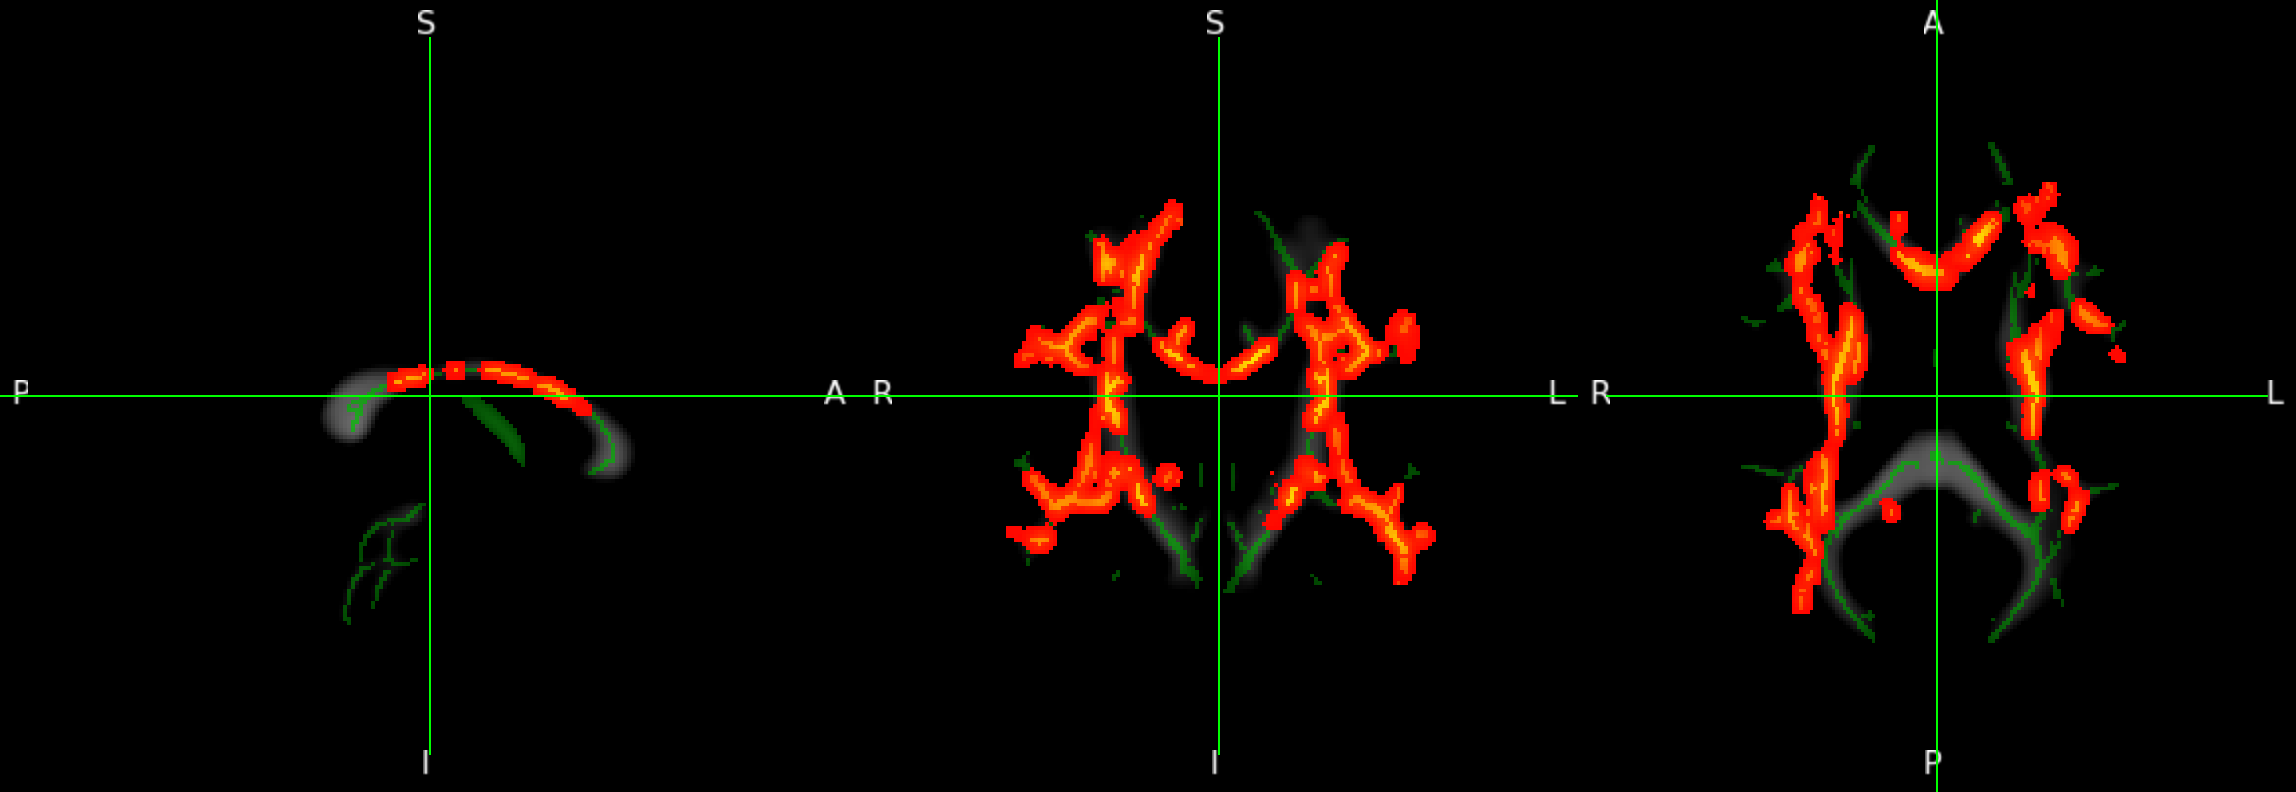